In [1]:
import sys
sys.path.append("..")
from common_utils import set_data_home
set_data_home("~/datasets")
from common_utils import DATA_HOME, join
from lstm.sales_data import Sales_Dataset
from torch.utils.data.dataloader import DataLoader
import torch

In [2]:
SALE_HOME = join(DATA_HOME, "sales_data")
MODEL_PTH = join(join(DATA_HOME, "sale_model"), "sale_model.pth")

sd = Sales_Dataset(SALE_HOME, seq_len=500)
test_set, train_set = torch.utils.data.random_split(sd, [0.2, 0.8])
train_dl = DataLoader(train_set, shuffle=True, batch_size=1)
test_dl = DataLoader(test_set, shuffle=True, batch_size=1)
len(train_dl), len(test_dl)

# # print(sd.O.describe())
# # print(sd.TR.describe())
# # print(sd.TS.describe())
# # print(sd.S.describe())
# print(sd[4][0].shape)
# print(sd[4][1].shape)
# # print(sd[4][0], sd[4][1])


(50673, 12669)

### PyTorch Model training

In [3]:
from torch.nn import LSTM
from torch.nn import MSELoss
from torch import optim
import matplotlib.pyplot as plt

I, H = 71, 33
epochs = 5

model = LSTM(71, 33, batch_first=True).cuda()
loss = MSELoss()
# param yhat, y: 3d tensors
# def loss(yhat, y):
#     slen = yhat.shape[0] * yhat.shape[1] * yhat.shape[2]
#     return (((torch.log(yhat+1) - torch.log(y+1)) ** 2).sum() / slen) ** 0.5

adam = optim.Adam(model.parameters(), lr=0.001)
h, c = torch.randn(1,1, 33, dtype=torch.float32).cuda(), torch.randn(1,1, 33, dtype=torch.float32).cuda()
tr_losses, inf_losses = [], []

train_gen = enumerate(train_dl)
test_gen = enumerate(test_dl)

for tr_idx, (X, y) in train_gen:
    tr_l, inf_l = 0, 0
    yhat, (_, _) = model(X, (h, c))
    l = loss(yhat, y.cuda())

    adam.zero_grad()
    l.backward()
    adam.step()
    tr_l += l.item()

    try:
        inf_idx, (X, y) = next(test_gen)
    except StopIteration:
        test = enumerate(test_dl)
        inf_idx, (X, y) = next(test_gen)
    yhat, (_, _) = model(X, (h, c))
    l = loss(yhat, y.cuda())
    inf_l += l.item()
    tr_losses.append(tr_l / len(train_dl))
    inf_losses.append(inf_l / len(test_dl))
    if tr_idx and tr_idx % 100 == 0:
        print(f"iteration: {tr_idx} train loss: {tr_l /len(train_dl)} inf loss: {inf_l / len(test_dl)}")


iteration: 100 train loss: 1.8087835960056196e-06 inf loss: 4.832049375533004e-06
iteration: 200 train loss: 1.0670033330343155e-06 inf loss: 4.205539292116381e-06
iteration: 300 train loss: 2.28882459355528e-06 inf loss: 7.828918245015801e-06
iteration: 400 train loss: 1.282087110690635e-06 inf loss: 5.35345122680375e-06
iteration: 500 train loss: 1.4823589759132423e-06 inf loss: 6.840411038187593e-06
iteration: 600 train loss: 1.2109272510311456e-06 inf loss: 6.072600155643021e-06
iteration: 700 train loss: 1.4935471240268673e-06 inf loss: 6.9227896772495e-06
iteration: 800 train loss: 1.4166641692446366e-07 inf loss: 5.747452207725345e-06
iteration: 900 train loss: 1.7202386807052568e-06 inf loss: 4.702206144996069e-06
iteration: 1000 train loss: 1.3061511936025515e-06 inf loss: 5.803208356216398e-06
iteration: 1100 train loss: 1.4339965872312622e-06 inf loss: 4.626800847115631e-06
iteration: 1200 train loss: 2.0292492062273923e-06 inf loss: 8.326622204129815e-06
iteration: 1300 tra

KeyboardInterrupt: 

### display losses

TypeError: 'list' object cannot be interpreted as an integer

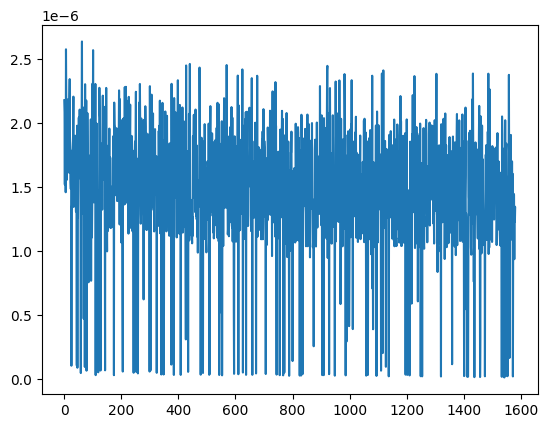

In [5]:
plt.plot(range(len(tr_losses)), tr_losses, label="train loss")
plt.plot(range(len(inf_losses)), inf_losses, label="test loss")
plt.legend()
plt.show()


### Custom Model training

In [ ]:
from mylstm import MyLSTM
from torch.nn import MSELoss
from torch import optim
import matplotlib.pyplot as plt

I, H = 71, 33
epochs = 5

model = MyLSTM(71, 33, batch_first=True).cuda()
loss = MSELoss()
# param yhat, y: 3d tensors
# def loss(yhat, y):
#     slen = yhat.shape[0] * yhat.shape[1] * yhat.shape[2]
#     return (((torch.log(yhat+1) - torch.log(y+1)) ** 2).sum() / slen) ** 0.5

adam = optim.Adam(model.parameters(), lr=0.001)
h, c = torch.randn(1, 1, 33, dtype=torch.float32).cuda(), torch.randn(1,1, 33, dtype=torch.float32).cuda()
tr_losses, inf_losses = [], []

train_gen = enumerate(train_dl)
test_gen = enumerate(test_dl)

for tr_idx, (X, y) in train_gen:
    tr_l, inf_l = 0, 0
    yhat, (_, _) = model(X, (h, c))
    l = loss(yhat, y.cuda())

    adam.zero_grad()
    l.backward()
    adam.step()
    tr_l += l.item()

    try:
        inf_idx, (X, y) = next(test_gen)
    except StopIteration:
        test = enumerate(test_dl)
        inf_idx, (X, y) = next(test_gen)
    yhat, (_, _) = model(X, (h, c))
    l = loss(yhat, y.cuda())
    inf_l += l.item()
    tr_losses.append(tr_l / len(train_dl))
    inf_losses.append(inf_l / len(test_dl))
    if tr_idx and tr_idx % 1000 == 0:
        print(f"iteration: {tr_idx} train loss: {tr_l /len(train_dl)} inf loss: {inf_l / len(test_dl)}")


In [ ]:
plt.plot(range(len(tr_losses)), tr_losses, label="train loss")
plt.plot(range(epochs), inf_losses, label="test loss")
plt.legend()
plt.show()


### save the model

In [ ]:
torch.save(model.state_dict(), MODEL_PTH)